In [16]:
import pandas as pd

In [17]:
#lead位点
eQTL = pd.read_csv('/CIMA/Result/20250108_cis_eQTL_studywise_sig.csv',index_col=0)
caQTL =  pd.read_csv('/CIMA/Result/20250108_cis_caQTL_studywise_sig.csv',index_col=0)
merged_df_qtl = pd.concat([eQTL, caQTL], axis=0)

In [18]:
SMR1 = pd.read_csv('/CIMA/Result/downstream/SMR_summary/eQTL_lime_sig_SMR_eGene_full.csv',index_col=0)
SMR1['lei'] = 'lime'
SMR1['QTL'] = 'eQTL'
SMR2 = pd.read_csv('/CIMA/Result/downstream/SMR_summary/caQTL_lime_sig_SMR_caPeak_full.csv',index_col=0)
SMR2['lei'] = 'lime'
SMR2['QTL'] = 'caQTL'
SMR3 = pd.read_csv('/CIMA/Result/downstream/SMR_summary/eQTL_BBJ_diease_SMR_eGene_full.csv',index_col=0)
SMR3['lei'] = 'BBJ'
SMR3['QTL'] = 'eQTL'
SMR4 = pd.read_csv('/CIMA/Result/downstream/SMR_summary/caQTL_BBJ_diease_SMR_caPeak_full.csv',index_col=0)
SMR4['lei'] = 'BBJ'
SMR4['QTL'] = 'caQTL'
SMR5 = pd.read_csv('/CIMA/Result/downstream/SMR_summary/eQTL_pQTL_SMR_eGene_full.csv',index_col=0)
SMR5['lei'] = 'pQTL'
SMR5['QTL'] = 'eQTL'
SMR6 = pd.read_csv('/CIMA/Result/downstream/SMR_summary/caQTL_pQTL_SMR_caPeak_full.csv',index_col=0)
SMR6['lei'] = 'pQTL'
SMR6['QTL'] = 'caQTL'

In [19]:
# 按行合并数据框
merged_df = pd.concat([SMR1, SMR2, SMR3, SMR4, SMR5, SMR6], axis=0)
# 重置索引（可选）
merged_df = merged_df.reset_index(drop=True)

In [5]:
merged_df.to_csv('/CIMA/Result/downstream/SMR_summary/merge_all_SMR_result.csv')

In [27]:
merged_df_lead = merged_df[merged_df['topSNP'].isin(eQTL['variant_id'])]
merged_df_lead = merged_df_lead[merged_df_lead['QTL'] == 'eQTL']

In [29]:
merged_df_lead.to_csv('/CIMA/Result/downstream/SMR_summary/merge_all_SMR_result_with_lead_eQTL.csv')

In [14]:
selection = pd.read_csv('/media/scPBMC1_AnalysisDisk1/huangzhuoli/hw5_backup/huangzhuoli/genetics_Data/chinese_selection_list_full.csv')

In [15]:
merged_df[merged_df['topSNP'].isin(selection['site_38'])]

,probeID,ProbeChr,Gene,Probe_bp,topSNP,topSNP_chr,topSNP_bp,A1,A2,Freq,...,p_eQTL,b_SMR,se_SMR,p_SMR,p_HEIDI,nsnp_HEIDI,celltype,trait,lei,QTL
3,TMEM258,11,TMEM258,61792802,chr11_61781087,11,61781087,G,A,0.509685,...,2.516958e-15,-1.106000,0.229644,1.463644e-06,0.367701,20.0,CD4_Tfh-like_CXCR5,LPC 20:4,lime,eQTL
1544,FADS2,11,FADS2,61792980,chr11_61811991,11,61811991,G,A,0.500000,...,6.872841e-29,0.113441,0.022215,3.282334e-07,0.385972,20.0,CD8_CTL_GZMB,stem_Cell_Factor_measurement,pQTL,eQTL
1607,FADS2,11,FADS2,61792980,chr11_61811991,11,61811991,G,A,0.500000,...,6.872841e-29,0.124867,0.022703,3.794707e-08,0.106848,20.0,CD8_CTL_GZMB,TNF_related_apoptosis_inducing_ligand_measurement,pQTL,eQTL


In [7]:
merged_df['celltype'].nunique()

68

In [8]:
merged_df['SMR_correlation'] = merged_df['topSNP']+'_'+merged_df['probeID']+'_'+merged_df['trait']

In [9]:
len(merged_df)

2085

In [24]:
merged_df['topSNP'].nunique()

833

In [25]:
merged_df['probeID'].nunique()

418

In [26]:
merged_df['trait'].nunique()

68

In [10]:
print('eGene '+ str(len(merged_df[merged_df['QTL'] == 'eQTL']['probeID'].unique())))
print('caPeak '+ str(len(merged_df[merged_df['QTL'] == 'caQTL']['probeID'].unique())))

eGene 138
caPeak 280


In [11]:
print('BBJ '+ str(len(merged_df[merged_df['lei'] == 'BBJ']['trait'].unique())))
print('pQTL '+ str(len(merged_df[merged_df['lei'] == 'pQTL']['trait'].unique())))
print('lime '+ str(len(merged_df[merged_df['lei'] == 'lime']['trait'].unique())))

BBJ 16
pQTL 47
lime 5


/tmp/ipykernel_586536/1403460195.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_counts = df.groupby('interval')['count'].sum()


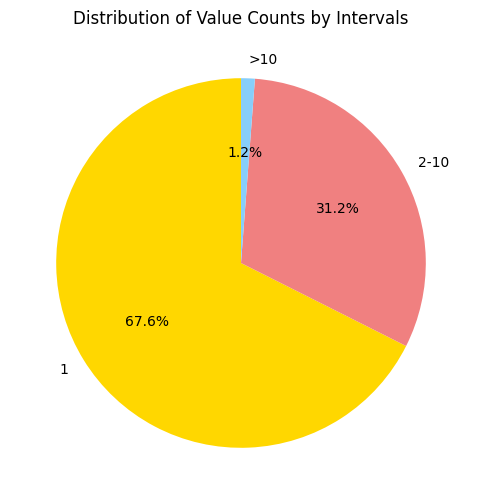

In [12]:
#统计TOPsnp是否是celltype specific的
result1 = pd.crosstab(merged_df['topSNP'],merged_df['celltype'])
result1[result1 > 1] = 1
result1 = result1.sum(axis=1)

import pandas as pd
import matplotlib.pyplot as plt

df = result1.value_counts().reset_index()
df.columns = ['value', 'count']

# 定义区间
bins = [0, 1, 10, float('inf')]  # 区间为 (0,1], (1,10], (10,∞)
labels = ['1', '2-10', '>10']

# 划分区间
df['interval'] = pd.cut(df['value'], bins=bins, labels=labels)

# 计算每个区间的总频率
interval_counts = df.groupby('interval')['count'].sum()

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(interval_counts, labels=interval_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])

# 添加标题
plt.title('Distribution of Value Counts by Intervals')

# 显示图形
plt.show()

In [13]:
#topSNP只在一个
interval_counts

interval
1       563
2-10    260
>10      10
Name: count, dtype: int64

/tmp/ipykernel_586536/3375585630.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_counts = df.groupby('interval')['count'].sum()


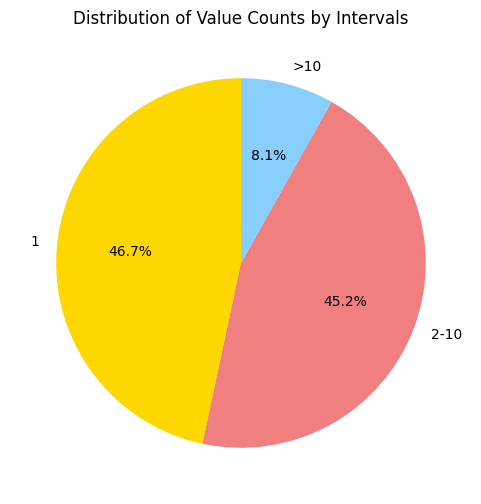

In [14]:
#统计Probe_ID是否是celltype specific的
result1 = pd.crosstab(merged_df['probeID'],merged_df['celltype'])
result1[result1 > 1] = 1
result1 = result1.sum(axis=1)

import pandas as pd
import matplotlib.pyplot as plt

df = result1.value_counts().reset_index()
df.columns = ['value', 'count']

# 定义区间
bins = [0, 1, 10, float('inf')]  # 区间为 (0,1], (1,10], (10,∞)
labels = ['1', '2-10', '>10']

# 划分区间
df['interval'] = pd.cut(df['value'], bins=bins, labels=labels)

# 计算每个区间的总频率
interval_counts = df.groupby('interval')['count'].sum()

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(interval_counts, labels=interval_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])

# 添加标题
plt.title('Distribution of Value Counts by Intervals')

# 显示图形
plt.show()

In [15]:
interval_counts

interval
1       195
2-10    189
>10      34
Name: count, dtype: int64

/tmp/ipykernel_586536/2515893808.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_counts = df.groupby('interval')['count'].sum()


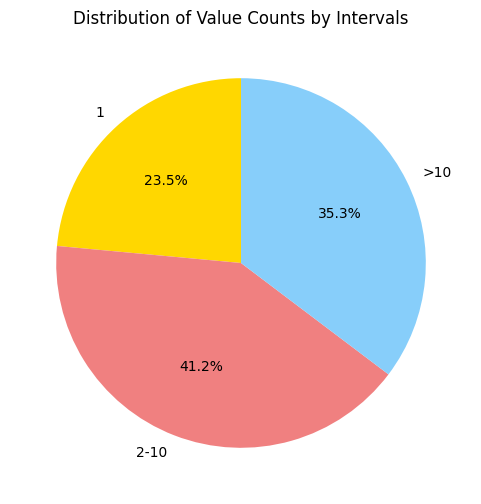

In [16]:
#统计trait是否是celltype specific的
result1 = pd.crosstab(merged_df['trait'],merged_df['celltype'])
result1[result1 > 1] = 1
result1 = result1.sum(axis=1)

import pandas as pd
import matplotlib.pyplot as plt

df = result1.value_counts().reset_index()
df.columns = ['value', 'count']

# 定义区间
bins = [0, 1, 10, float('inf')]  # 区间为 (0,1], (1,10], (10,∞)
labels = ['1', '2-10', '>10']

# 划分区间
df['interval'] = pd.cut(df['value'], bins=bins, labels=labels)

# 计算每个区间的总频率
interval_counts = df.groupby('interval')['count'].sum()

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(interval_counts, labels=interval_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])

# 添加标题
plt.title('Distribution of Value Counts by Intervals')

# 显示图形
plt.show()

In [17]:
interval_counts

interval
1       16
2-10    28
>10     24
Name: count, dtype: int64

/tmp/ipykernel_586536/3859410737.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_counts = df.groupby('interval')['count'].sum()


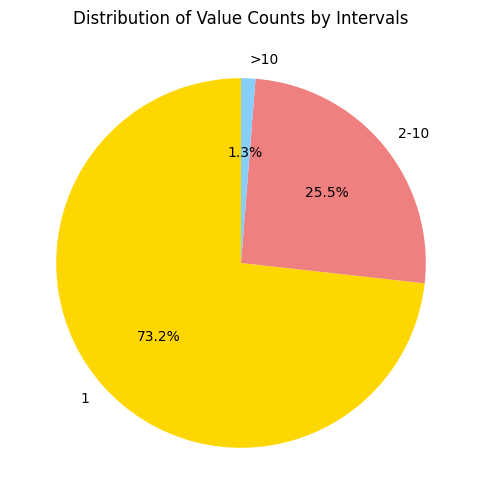

In [18]:
#统计trait是否是celltype specific的
result1 = pd.crosstab(merged_df['SMR_correlation'],merged_df['celltype'])
result1[result1 > 1] = 1
result1 = result1.sum(axis=1)

import pandas as pd
import matplotlib.pyplot as plt

df = result1.value_counts().reset_index()
df.columns = ['value', 'count']

# 定义区间
bins = [0, 1, 10, float('inf')]  # 区间为 (0,1], (1,10], (10,∞)
labels = ['1', '2-10', '>10']

# 划分区间
df['interval'] = pd.cut(df['value'], bins=bins, labels=labels)

# 计算每个区间的总频率
interval_counts = df.groupby('interval')['count'].sum()

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(interval_counts, labels=interval_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])

# 添加标题
plt.title('Distribution of Value Counts by Intervals')

# 显示图形
plt.show()

In [19]:
interval_counts

interval
1       876
2-10    305
>10      15
Name: count, dtype: int64

In [20]:
result1.sort_values(ascending=True)

SMR_correlation
chr10_92682235_HHEX_T2D                                                        1
chr10_63123556_NRBF2_T2D                                                       1
chr10_63136072_NRBF2_T2D                                                       1
chr10_63141463_NRBF2_T2D                                                       1
chr10_63147821_chr10:63225640-63226141_C_X_C_motif_chemokine_5_measurement     1
                                                                              ..
chr6_34414160_RPS10-NUDT3_RA                                                  15
chr12_112115228_HECTD4_C_X_C_motif_chemokine_10_measurement                   15
chr1_157701026_FCRL3_GD                                                       16
chr11_4091970_STIM1_Urt                                                       25
chr12_56007301_RPS26_As                                                       64
Length: 1196, dtype: int64

In [22]:
#一共833的位点鉴定出了显著SMR关系
merged_df['topSNP'].nunique()
#其中613个是topSNP
sum(pd.Series(merged_df['topSNP'].unique()).isin(merged_df_qtl['variant_id']))

616

/tmp/ipykernel_586536/2336443239.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=celltype_counts.index, y=celltype_counts.values, palette='magma_r')  # 使用 magma 的反向颜色
/tmp/ipykernel_586536/2336443239.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # 自动调整布局


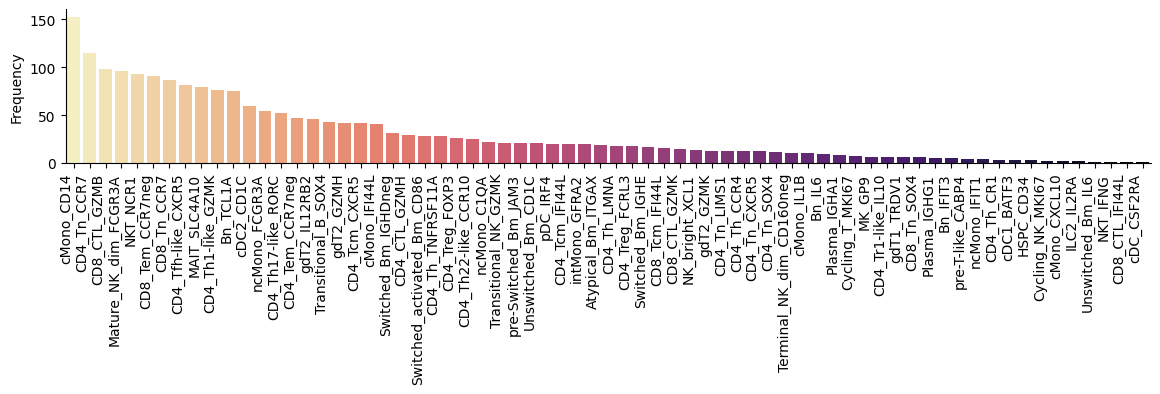

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="sans-serif"
plt.rcParams["pdf.fonttype"]= 42
# 获取 celltype 的频率
celltype_counts = merged_df['celltype'].value_counts()

# 绘制直方图
plt.figure(figsize=(14, 2))  # 设置图形大小
sns.barplot(x=celltype_counts.index, y=celltype_counts.values, palette='magma_r')  # 使用 magma 的反向颜色

# 添加标题和标签
#plt.title('Cell Type Frequency')
plt.xlabel('')
plt.ylabel('Frequency')

# 旋转 x 轴标签（如果名称太长）
plt.xticks(rotation=90, ha='right')

# 添加图例
#plt.legend(['Frequency'], frameon=False)  # 添加图例并去掉边框

# 去掉图形边框
sns.despine(left=False, bottom=False)  # 去掉左侧和底部边框

# 显示图形
plt.tight_layout()  # 自动调整布局
plt.savefig('/CIMA/Result/plot/20250310_fig6_sig_smr_numbers_by_celltype.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 画挑选出来的位点

In [4]:
merged_df =pd.read_csv('/CIMA/Result/downstream/SMR_summary/merge_all_SMR_result.csv',index_col=0)

In [9]:
sum(merged_df['topSNP'] == 'chr6_26375933')

0

In [6]:
merged_df[merged_df['topSNP'] == 'chr6_26375933']

,probeID,ProbeChr,Gene,Probe_bp,topSNP,topSNP_chr,topSNP_bp,A1,A2,Freq,...,p_eQTL,b_SMR,se_SMR,p_SMR,p_HEIDI,nsnp_HEIDI,celltype,trait,lei,QTL


In [104]:
merged_df[merged_df['probeID'] == "PADI2"]['p_SMR']

642    0.000002
Name: p_SMR, dtype: float64

In [108]:
import numpy as np

In [135]:
a1 = merged_df[merged_df['topSNP'] == "chr6_167125409"]['p_SMR'].values

In [136]:
a1

array([9.860982e-10, 1.639085e-06, 1.217152e-12, 6.425572e-08])

In [163]:
merged_df[merged_df['topSNP'] == "chr1_153366838"]['p_SMR']

1800    4.582390e-06
1801    1.247640e-07
1804    9.600302e-07
1805    2.136558e-10
1806    1.172920e-06
1807    1.942347e-07
1808    2.223188e-07
1809    4.165181e-06
1810    1.193621e-08
2052    5.366528e-09
Name: p_SMR, dtype: float64

In [162]:
merged_df[merged_df['topSNP'] == "chr1_153366838"]

,probeID,ProbeChr,Gene,Probe_bp,topSNP,topSNP_chr,topSNP_bp,A1,A2,Freq,...,b_SMR,se_SMR,p_SMR,p_HEIDI,nsnp_HEIDI,celltype,trait,lei,QTL,SMR_correlation
1800,S100A12,1,S100A12,153375621,chr1_153366838,1,153366838,C,A,0.113801,...,0.396907,0.086603,4.582390e-06,0.082199,5.0,Bn_TCL1A,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A12_protein_S100_A12_measur...
1801,S100A12,1,S100A12,153375621,chr1_153366838,1,153366838,C,A,0.113801,...,0.454457,0.085968,1.247640e-07,0.204097,14.0,CD4_Tn_CCR7,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A12_protein_S100_A12_measur...
1804,S100A9,1,S100A9,153357854,chr1_153366838,1,153366838,C,A,0.113801,...,0.306609,0.062578,9.600302e-07,0.380859,14.0,cMono_CD14,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A9_protein_S100_A12_measure...
1805,S100A12,1,S100A12,153375621,chr1_153366838,1,153366838,C,A,0.113801,...,0.182873,0.028793,2.136558e-10,0.252865,15.0,cMono_CD14,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A12_protein_S100_A12_measur...
1806,S100A8,1,S100A8,153391073,chr1_153366838,1,153366838,C,A,0.113801,...,0.384400,0.079092,1.172920e-06,0.201610,11.0,cMono_CD14,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A8_protein_S100_A12_measure...
1807,S100A9,1,S100A9,153357854,chr1_153366838,1,153366838,C,A,0.113801,...,0.253911,0.048784,1.942347e-07,0.349869,14.0,cMono_IFI44L,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A9_protein_S100_A12_measure...
1808,S100A8,1,S100A8,153391073,chr1_153366838,1,153366838,C,A,0.113801,...,0.306908,0.059253,2.223188e-07,0.161362,9.0,cMono_IFI44L,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A8_protein_S100_A12_measure...
1809,S100A9,1,S100A9,153357854,chr1_153366838,1,153366838,C,A,0.113801,...,0.302928,0.065811,4.165181e-06,0.245863,14.0,cMono_IL1B,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A9_protein_S100_A12_measure...
1810,S100A12,1,S100A12,153375621,chr1_153366838,1,153366838,C,A,0.113801,...,0.201182,0.035291,1.193621e-08,0.226905,14.0,cMono_IL1B,protein_S100_A12_measurement,pQTL,eQTL,chr1_153366838_S100A12_protein_S100_A12_measur...
2052,chr1:153367064-153367565,1,NaN,153367314,chr1_153366838,1,153366838,C,A,0.113801,...,0.171348,0.029364,5.366528e-09,0.330873,14.0,cMono_CD14,protein_S100_A12_measurement,pQTL,caQTL,chr1_153366838_chr1:153367064-153367565_protei...


In [155]:
merged_df[merged_df['topSNP'] == "chr11_61781087"]['p_GWAS']

3    1.279370e-09
Name: p_GWAS, dtype: float64

In [157]:
merged_df[merged_df['topSNP'] == "chr11_61781087"]['p_eQTL']

3    2.516958e-15
Name: p_eQTL, dtype: float64

In [138]:
merged_df[merged_df['probeID'] == "PADI2"]

,probeID,ProbeChr,Gene,Probe_bp,topSNP,topSNP_chr,topSNP_bp,A1,A2,Freq,...,b_SMR,se_SMR,p_SMR,p_HEIDI,nsnp_HEIDI,celltype,trait,lei,QTL,SMR_correlation
642,PADI2,1,PADI2,17119451,chr1_17089967,1,17089967,A,G,0.430993,...,0.107687,0.022604,0.000002,0.088247,20.0,cMono_CD14,RA,BBJ,eQTL,chr1_17089967_PADI2_RA


In [110]:
np.format_float_scientific(merged_df[merged_df['probeID'] == "PADI2"]['p_SMR'],precision=1)

/home/huangzhuoli/mambaforge/envs/scPAFA_env/lib/python3.10/site-packages/numpy/core/arrayprint.py:1125: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return dragon4_scientific(x, precision=precision, unique=unique,


'1.9e-06'

In [139]:
pval_test = pd.read_parquet('/CIMA/Result/eQTL_tensorqtl_mergenominal/CD4_Treg_FCRL3.parquet')

In [142]:
pval_test['pair'] = pval_test['phenotype_id']+'_'+pval_test['variant_id']

In [146]:
pval_test[pval_test['pair'] == 'IKZF4_chr12_56050848']

,phenotype_id,variant_id,start_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,pair
17705746,IKZF4,chr12_56050848,43189,0.242611,166,197,0.000429,-0.265072,0.074586,IKZF4_chr12_56050848


In [149]:
TEST1 = pd.read_csv('/CIMA/Result/20250108_cis_eQTL_all.csv',index_col=0)

In [153]:
TEST1[TEST1['phenotype_id'] == 'IKZF4']

,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,end_distance,ma_samples,...,pval_nominal,slope,slope_se,pval_perm,pval_beta,celltype,celltype_level_qval,celltype_level_pval_nominal_threshold,study_wise_qval,study_wise_nominal_threshold
53076,IKZF4,2822,1.027337,126.593860,306.22223,6.908804e-03,chr12_55655541,-352118,-352118,224,...,3.183254e-03,0.211223,0.071138,0.577242,0.571846,CD4_Tem_CCR7neg,0.459354,0.000173,0.537888,0.000104
63883,IKZF4,2822,1.027523,118.256330,303.24420,1.484824e-02,chr12_55581059,-426600,-426600,207,...,7.517678e-03,-0.189136,0.070363,0.824218,0.822244,CD4_Tfh-like_CXCR5,0.452421,0.000296,0.612799,0.000112
74482,IKZF4,2822,1.037313,124.031430,305.43677,1.789830e-03,chr12_55178717,-828942,-828942,97,...,6.390575e-04,-0.339715,0.098631,0.184582,0.184979,CD4_Th1-like_GZMK,0.215305,0.000229,0.332139,0.000111
84612,IKZF4,2822,1.046201,121.016014,302.69824,9.751115e-03,chr12_56566982,559323,559323,104,...,4.533014e-03,-0.263390,0.092217,0.679432,0.676504,CD4_Th17-like_RORC,0.483701,0.000194,0.572046,0.000119
128598,IKZF4,2822,1.042078,115.959630,299.44162,1.011766e-02,chr12_55842259,-165400,-165400,252,...,4.514020e-03,0.170047,0.059508,0.680632,0.676026,CD4_Tn_CCR7,0.285398,0.000639,0.571906,0.000122
162763,IKZF4,2822,1.029404,128.048300,308.94180,2.237687e-04,chr12_56075048,67389,67389,188,...,6.022494e-05,0.304604,0.075037,0.022598,0.025124,CD4_Treg_FCRL3,0.105063,0.000086,0.092568,0.000104
171417,IKZF4,2822,1.048502,123.306080,303.46010,4.499190e-07,chr12_56050848,43189,43189,166,...,3.105437e-08,-0.370376,0.065465,0.000200,0.000034,CD4_Treg_FOXP3,0.000330,0.000103,0.000274,0.000118
181378,IKZF4,2822,1.033402,126.185140,307.07498,1.471518e-02,chr12_56507281,499622,499622,171,...,7.818854e-03,-0.207944,0.077748,0.837216,0.837785,CD8_CTL_GZMB,0.472133,0.000254,0.616868,0.000107
209837,IKZF4,2822,1.029788,128.473570,308.02250,1.057659e-03,chr12_55819513,-188146,-188146,238,...,3.635714e-04,-0.252450,0.070145,0.115788,0.118143,CD8_Tem_CCR7neg,0.132713,0.000293,0.261569,0.000104
221884,IKZF4,2825,1.045927,120.676440,301.84344,7.230644e-03,chr12_56676232,668573,668573,195,...,3.177036e-03,0.200603,0.067546,0.565143,0.562659,CD8_Tn_CCR7,0.301477,0.000454,0.534605,0.000119
